Data Summary:
Class
0.0    15862
1.0       73
Name: count, dtype: int64
Confusion Matrix:
[[3170    0]
 [  17    1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3170
         1.0       1.00      0.06      0.11        18

    accuracy                           0.99      3188
   macro avg       1.00      0.53      0.55      3188
weighted avg       0.99      0.99      0.99      3188



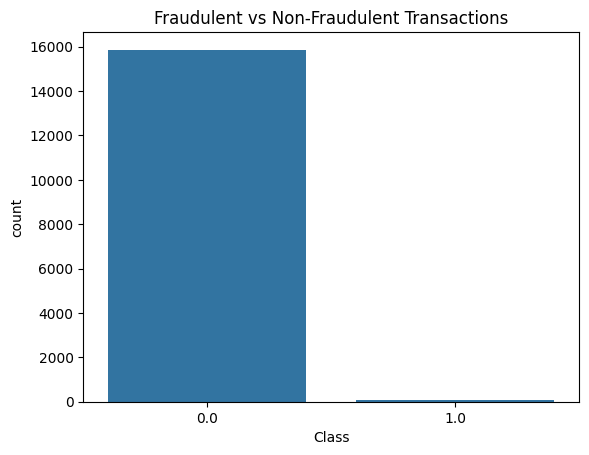

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')  # Make sure the dataset is in the same folder or provide path

print("Data Summary:")
print(df['Class'].value_counts())  # Check imbalance

# Split data
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred = model.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert to 1 (fraud) and 0 (normal)

# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize fraud vs non-fraud
sns.countplot(x=y)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.show()